<a href="https://colab.research.google.com/github/MohiniRathore20/Aiml-Lab--Mohini-rathore/blob/main/Aiml%20exp%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 Rows of the Dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter 

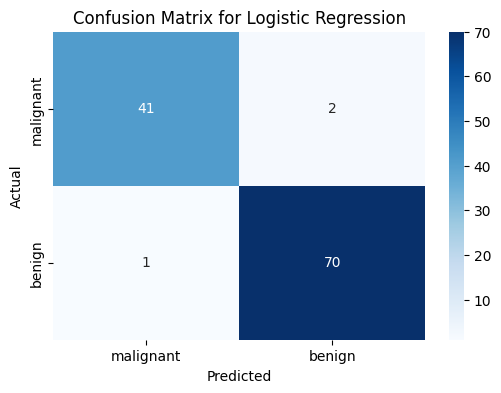


Decision Tree Performance:
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score     support
malignant      0.930233  0.930233  0.930233   43.000000
benign         0.957746  0.957746  0.957746   71.000000
accuracy       0.947368  0.947368  0.947368    0.947368
macro avg      0.943990  0.943990  0.943990  114.000000
weighted avg   0.947368  0.947368  0.947368  114.000000

Confusion Matrix:


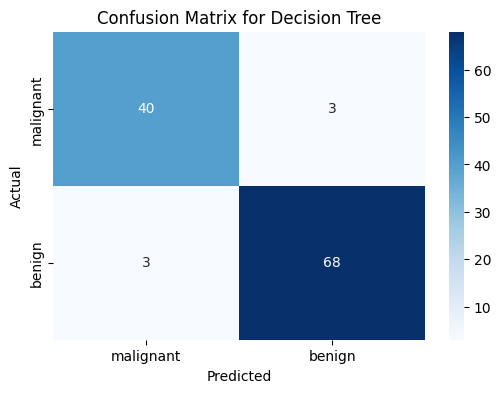


Random Forest Performance:
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score     support
malignant      0.975610  0.930233  0.952381   43.000000
benign         0.958904  0.985915  0.972222   71.000000
accuracy       0.964912  0.964912  0.964912    0.964912
macro avg      0.967257  0.958074  0.962302  114.000000
weighted avg   0.965205  0.964912  0.964738  114.000000

Confusion Matrix:


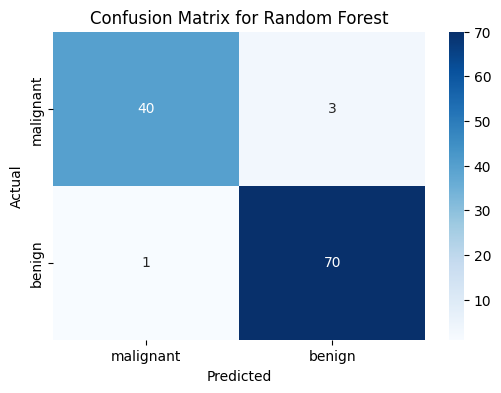


Insights and Conclusions:
 - Logistic Regression:
   Accuracy: 0.97
   Precision for malignant class: 0.98
   Recall for malignant class: 0.95
   F1-score for malignant class: 0.96
 - Decision Tree:
   Accuracy: 0.95
   Precision for malignant class: 0.93
   Recall for malignant class: 0.93
   F1-score for malignant class: 0.93
 - Random Forest:
   Accuracy: 0.96
   Precision for malignant class: 0.98
   Recall for malignant class: 0.93
   F1-score for malignant class: 0.95

The Random Forest model tends to perform better due to its ensemble nature, 
while Logistic Regression is straightforward and interpretable. Potential improvements 
could include hyperparameter tuning, feature selection, and trying other models such as SVM or KNN.



In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Preprocessing
# Load the Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Inspect the first few rows
print("First 5 Rows of the Dataset:")
print(df.head())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(df[data.feature_names])
y = df['target']

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Model Selection and Implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100)
}

# Train and test each model
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=data.target_names, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)
    results[name] = {"accuracy": accuracy, "report": report, "confusion": confusion}

# 3. Model Evaluation
for name, result in results.items():
    print(f"\n{name} Performance:")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print("Classification Report:")
    print(pd.DataFrame(result['report']).transpose())
    print("\nConfusion Matrix:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(result['confusion'], annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 4. Insights and Conclusion
print("\nInsights and Conclusions:")
for name, result in results.items():
    print(f" - {name}:")
    print(f"   Accuracy: {result['accuracy']:.2f}")
    print(f"   Precision for malignant class: {result['report']['malignant']['precision']:.2f}")
    print(f"   Recall for malignant class: {result['report']['malignant']['recall']:.2f}")
    print(f"   F1-score for malignant class: {result['report']['malignant']['f1-score']:.2f}")

print("""
The Random Forest model tends to perform better due to its ensemble nature,
while Logistic Regression is straightforward and interpretable. Potential improvements
could include hyperparameter tuning, feature selection, and trying other models such as SVM or KNN.
""")
